# Figure 2

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import warnings
import os
import functools
import upsetplot

warnings.filterwarnings('ignore')
plt.rc('font', family='Helvetica')

# 2b

In [132]:
CBE_counts = pd.read_csv('mageck/CBE_bc_counts.txt', sep='\t')
ABE_counts = pd.read_csv('mageck/ABE_bc_counts.txt', sep='\t')
CBE_counts = CBE_counts[CBE_counts.columns[2:]]
ABE_counts = ABE_counts[ABE_counts.columns[2:]]

[53.11619452 14.31995016]


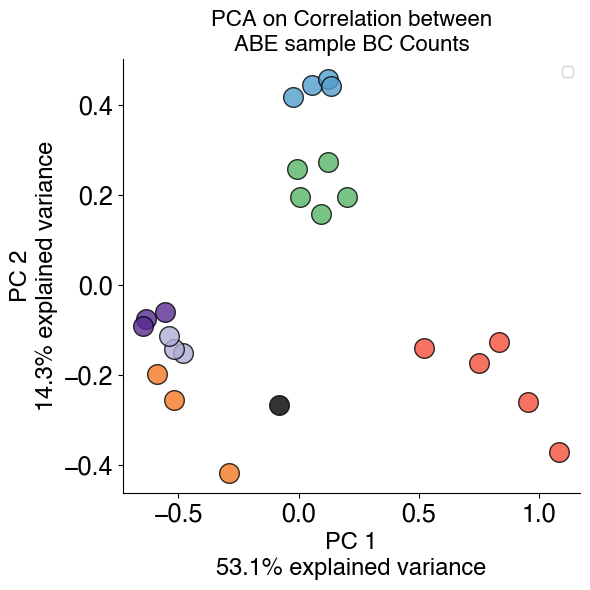

In [133]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xt = pca.fit_transform(ABE_counts.corr(method='spearman'))
fig, ax = plt.subplots(figsize=(6,6))

blues = sns.color_palette('Blues')
greens = sns.color_palette('Greens')
reds = sns.color_palette('Reds')
yellows = sns.color_palette('Oranges')
purples = sns.color_palette('Purples')


blues = blues.as_hex()
greens = greens.as_hex()
reds = reds.as_hex()
yellows = yellows.as_hex()

palette = [blues[0], blues[2], blues[3], blues[5], greens[1], greens[2], greens[3], greens[4], greens[5],  reds[1], reds[2], reds[3], reds[4], reds[5],
           yellows[1], yellows[2], yellows[3], purples[0], purples[1], purples[2], purples[3], purples[4], purples[5], 'black']



palette = [blues[3], blues[3], blues[3], blues[3], greens[3], greens[3], greens[3], greens[3], greens[3],  reds[3], reds[3], reds[3], reds[3], reds[3],
           yellows[3], yellows[3], yellows[3], purples[2], purples[2], purples[2], purples[5], purples[5], purples[5], 'black']

for i in range(len(Xt)):
    ax.scatter(Xt[i][0], Xt[i][1], edgecolor='black', s=200, alpha=.8,c=palette[i]) #,label=list(ABE_counts.columns)[i])

ax.legend(loc='best')

var = pca.explained_variance_ratio_
print(var*100)
ax.set_xlabel(f'PC 1\n{np.round(var[0]*100, 1)}% explained variance', fontsize=17)
ax.set_ylabel(f'PC 2\n{np.round(var[1]*100, 1)}% explained variance', fontsize=17)
#ax.legend(bbox_to_anchor=(1.05, 1.))
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=18,)
ax.set_title('PCA on Correlation between\nABE sample BC Counts', fontsize=16)
fig.tight_layout()

# 2c

[36.03498449 11.14300231]


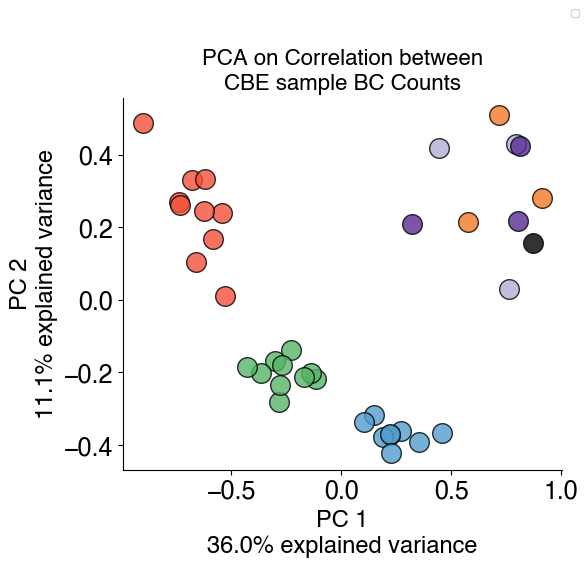

In [134]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xt = pca.fit_transform(CBE_counts.corr(method='spearman'))
fig, ax = plt.subplots(figsize=(6,6))

blues = sns.color_palette('Blues')
greens = sns.color_palette('Greens')
reds = sns.color_palette('Reds')
yellows = sns.color_palette('Oranges')
purples = sns.color_palette('Purples')


blues = blues.as_hex()
greens = greens.as_hex()
reds = reds.as_hex()
yellows = yellows.as_hex()

palette = [blues[3], blues[3], blues[3], blues[3], blues[3], blues[3], blues[3], blues[3], blues[3], 
           greens[3], greens[3], greens[3], greens[3], greens[3], greens[3], greens[3], greens[3], greens[3], greens[3],
           reds[3], reds[3], reds[3], reds[3], reds[3], reds[3],reds[3], reds[3], reds[3], reds[3],
           yellows[3], yellows[3], yellows[3], 
           purples[2], purples[2], purples[2], purples[5], purples[5], purples[5], 
           'black']


for i in range(len(Xt)):
    ax.scatter(Xt[i][0], Xt[i][1], edgecolor='black', s=200, alpha=.8,c=palette[i]) #, label=list(CBE_counts.columns)[i])

ax.legend(loc='best')

var = pca.explained_variance_ratio_
print(var*100)
ax.set_xlabel(f'PC 1\n{np.round(var[0]*100, 1)}% explained variance', fontsize=17)
ax.set_ylabel(f'PC 2\n{np.round(var[1]*100, 1)}% explained variance', fontsize=17)
ax.legend(bbox_to_anchor=(1.05, 1.25), fontsize=7)
ax.spines[['top', 'right']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=18,)
ax.set_title('PCA on Correlation between\nCBE sample BC Counts', fontsize=16)
fig.tight_layout()

# 2d

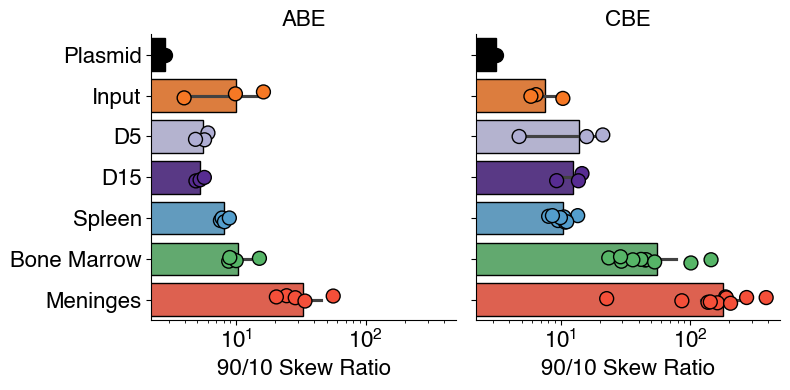

In [135]:
CBE_samps = list(CBE_counts.columns)
ABE_samps = list(ABE_counts.columns)

CBE_skew = []
ABE_skew = []
for i in CBE_samps:
    d = sorted(np.asarray(CBE_counts[i]))
    ten = int(.1*len(d))
    ninety = int(.9*len(d))
    CBE_skew.append(d[ninety]/d[ten])

for i in ABE_samps:
    d = sorted(np.asarray(ABE_counts[i]))
    ten = int(.1*len(d))
    ninety = int(.9*len(d))
    ABE_skew.append(d[ninety]/d[ten])

CBE_skew_df = pd.DataFrame(dict(zip(['Sample', '90/10 Skew Ratio'], [CBE_samps, CBE_skew])))
ABE_skew_df = pd.DataFrame(dict(zip(['Sample', '90/10 Skew Ratio'], [ABE_samps, ABE_skew])))

ax_dict_CBE = dict(zip(['spleen1', 'spleen2', 'spleen3', 'spleen4', 'spleen5', 'spleen6',
       'spleen7', 'spleen8', 'spleen9', 'bonemarrow1', 'bonemarrow2',
       'bonemarrow3', 'bonemarrow4', 'bonemarrow5', 'bonemarrow6',
       'bonemarrow7', 'bonemarrow8', 'bonemarrow9', 'bonemarrow10',
       'meninges1', 'meninges2', 'meninges3', 'meninges4', 'meninges5',
       'meninges6', 'meninges7', 'meninges8', 'meninges9', 'meninges10',
       'input_rep1', 'input_rep2', 'input_rep3', 'd5_rep1', 'd5_rep2',
       'd5_rep3', 'd15_rep1', 'd15_rep2', 'd15_rep3', 'plasmidlib'], 
       [4,4,4,4,4,4,4,4,4,
        5,5,5,5,5,5,5,5,5,5,
        6,6,6,6,6,6,6,6,6,6,
        1,1,1,
        2,2,2,
        3,3,3,
        0]))

ax_dict_ABE = dict(zip(['spleen1', 'spleen2', 'spleen3', 'spleen4', 
          'bonemarrow1','bonemarrow2', 'bonemarrow3', 'bonemarrow4', 'bonemarrow5',
            'meninges1','meninges2', 'meninges3', 'meninges4', 'meninges5',
              'input_rep1', 'input_rep2', 'input_rep3',
                'd5_rep1', 'd5_rep2', 'd5_rep3', 
                'd15_rep1','d15_rep2', 'd15_rep3', 
                'plasmidlib'], 
       [4,4,4,4,
        5,5,5,5,5,
        6,6,6,6,6,
        1,1,1,
        2,2,2,
        3,3,3,
        0]))

d2 = dict(zip([0,1,2,3,4,5,6],['Plasmid', 'Input','D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']))

CBE_name = []
ABE_name = []
for i, val in CBE_skew_df.iterrows():
    s = val['Sample']
    s2 = ax_dict_CBE[s]
    s3 = d2[s2]
    CBE_name.append(s3)

for i, val in ABE_skew_df.iterrows():
    s = val['Sample']
    s2 = ax_dict_ABE[s]
    s3 = d2[s2]
    ABE_name.append(s3)

ABE_skew_df['Name'] = ABE_name
CBE_skew_df['Name'] = CBE_name


fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)

blues = blues.as_hex()
greens = greens.as_hex()
reds = reds.as_hex()
yellows = yellows.as_hex()

palette = ['black', yellows[3], purples[2], purples[5], blues[3], greens[3], reds[3]]
order=['Plasmid', 'Input', 'D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']

sns.barplot(data = ABE_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order)
sns.barplot(data = CBE_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette,order=order)

sns.stripplot(data = ABE_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
sns.stripplot(data = CBE_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_ylabel('')
ax[1].set_ylabel('')

ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=16,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=16,)
ax[0].set_title('ABE', fontsize=16)
ax[1].set_title('CBE', fontsize=16)
ax[0].set_xlabel('90/10 Skew Ratio', fontsize=16)
ax[1].set_xlabel('90/10 Skew Ratio', fontsize=16)

fig.tight_layout()

# 2e

In [136]:
MBES = pd.read_csv('MBESv2_CORRECTED.csv')
ABE = MBES[(MBES['Editor']=='ABE') & (MBES['classification']=='targeting guide')]
#CBE_non_leg = MBES[(MBES['Editor']=='CBE') & (MBES['legacy']==False) & (MBES['classification']=='targeting guide')]

CBE = MBES[(MBES['Editor']=='CBE') & (MBES['classification']=='targeting guide')]


ABE_raw = os.listdir('ABE_editing/raw')
CBE_raw = os.listdir('CBE_editing_UPDATED/raw')

#remove spleen 5 do to almost zero reads
ABE_raw.remove('spleen_rep5_ABE.csv')


#set filters for minimum number of sensor reads
min_sensor_reads = 10

t = []
corr = []
name = []

name_dict = {'meninges':'Meninges', 'spleen':'Spleen', 'bonemarrow':'Bone Marrow', 'd5':'D5', 'd15':'D15', 'plasmidlib':'Plasmid', 'input':'Input'}

for i in ABE_raw:
    g = pd.read_csv(f'ABE_editing/raw/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
    g2 = pd.merge(g, ABE, on='gRNA_id')
    g2 = g2[g2['Reads_aligned_all_amplicons']>=min_sensor_reads]
    t.append(np.average(g2['target_base_edit_perc']))
    corr.append(np.average(g2['corr_perc']))
    name.append(name_dict[i.split('_')[0]])


t2 = []
corr2 = []
name2 = []

for i in CBE_raw:
    g = pd.read_csv(f'CBE_editing_UPDATED/raw/{i}').rename(columns = {'Guide_ID':'gRNA_id'})
    g2 = pd.merge(g, CBE, on='gRNA_id')
    g2 = g2[g2['Reads_aligned_all_amplicons']>=min_sensor_reads]
    t2.append(np.average(g2['target_base_edit_perc']))
    corr2.append(np.average(g2['corr_perc']))
    name2.append(name_dict[i.split('_')[0]])


CBE_editing1 = pd.DataFrame(dict(zip(['Sample', 'Editing %',], [name2, t2,])))
CBE_editing2 = pd.DataFrame(dict(zip(['Sample', 'Editing %'], [name2, corr2])))
CBE_editing1['Edit Type'] = 'Target Editing (w/ Bystanders)'
CBE_editing2['Edit Type'] = 'Pure Correct Editing'
CBE_editing = pd.concat((CBE_editing1, CBE_editing2))


ABE_editing1 = pd.DataFrame(dict(zip(['Sample', 'Editing %',], [name, t,])))
ABE_editing2 = pd.DataFrame(dict(zip(['Sample', 'Editing %'], [name, corr])))
ABE_editing1['Edit Type'] = 'Target Editing (w/ Bystanders)'
ABE_editing2['Edit Type'] = 'Pure Correct Editing'
ABE_editing = pd.concat((ABE_editing1, ABE_editing2))


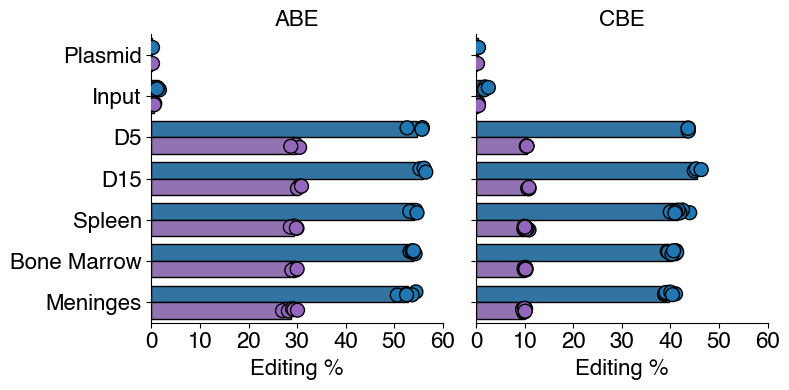

In [137]:
fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)

sns.barplot(data = ABE_editing, y='Sample', x='Editing %', hue='Edit Type', ax=ax[0], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'], order=order)
sns.barplot(data = CBE_editing, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'],order=order)#), legend=False)


sns.stripplot(data = ABE_editing, y='Sample', x='Editing %', hue='Edit Type', ax=ax[0], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'], order=order, dodge=True, s=10)
sns.stripplot(data = CBE_editing, y='Sample', x='Editing %', hue='Edit Type', ax=ax[1], edgecolor='black', linewidth=1, palette = ['tab:blue', 'tab:purple'],order=order, dodge=True, s=10)#), legend=False)

#sns.stripplot(data = ABE_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
#sns.stripplot(data = CBE_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)

ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[0].set_xticks([0,10,20,30,40,50,60])
ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=16,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=16,)
ax[0].set_title('ABE', fontsize=16)
ax[1].set_title('CBE', fontsize=16)
ax[0].set_xlabel('Editing %', fontsize=16)
ax[1].set_xlabel('Editing %', fontsize=16)
ax[0].legend([],[], frameon=False)
ax[1].legend([],[], frameon=False)

fig.tight_layout()
#fig.savefig('figures/fig2e.pdf')


# 2f

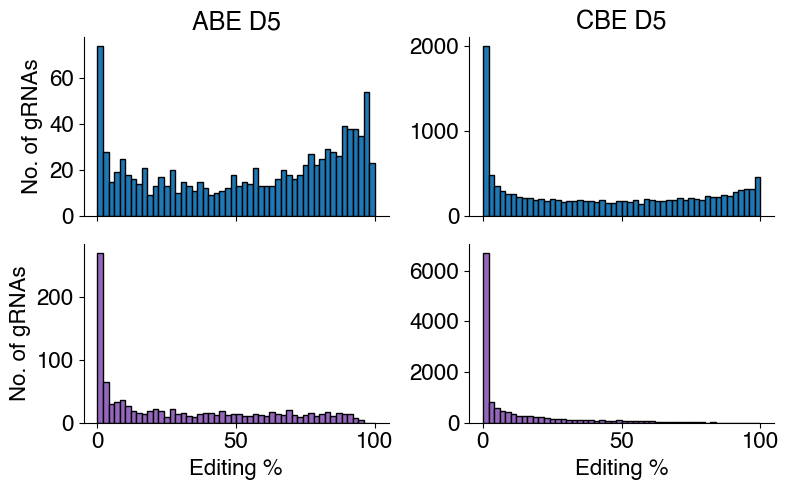

In [138]:
d5_ABE = pd.read_csv('ABE_editing/MLE/d5_ABE_MLE.csv').rename(columns = {'Guide_ID':'gRNA_id'})
d5_CBE = pd.read_csv('CBE_editing_UPDATED/MLE/d5_CBE_MLE.csv').rename(columns = {'Guide_ID':'gRNA_id'})

ABE = MBES[(MBES['Editor']=='ABE') & (MBES['classification']=='targeting guide')]
CBE_non_leg = MBES[(MBES['Editor']=='CBE') & (MBES['classification']=='targeting guide')]

ABE_edits = pd.merge(d5_ABE, ABE, on='gRNA_id')
CBE_edits = pd.merge(d5_CBE, CBE_non_leg, on='gRNA_id')

fig, ax = plt.subplots(2,2,figsize=(8,5), sharex=True, sharey=False)

ax[0][0].hist(ABE_edits['target_base_edit_perc'], bins=np.linspace(0,100,51), linewidth=1, color='tab:blue', edgecolor='black')
ax[1][0].hist(ABE_edits['corr_perc'], bins=np.linspace(0,100,51), linewidth=1, color='tab:purple', edgecolor='black')

ax[0][1].hist(CBE_edits['target_base_edit_perc'], bins=np.linspace(0,100,51), color='tab:blue', linewidth=1, edgecolor='black')
ax[1][1].hist(CBE_edits['corr_perc'], bins=np.linspace(0,100,51), linewidth=1, color='tab:purple', edgecolor='black')

ax[0][0].spines[['top', 'right']].set_visible(False)
ax[0][0].tick_params(axis='both', which='major', labelsize=16,)
ax[1][0].spines[['top', 'right']].set_visible(False)
ax[1][0].tick_params(axis='both', which='major', labelsize=16,)
ax[0][1].spines[['top', 'right']].set_visible(False)
ax[0][1].tick_params(axis='both', which='major', labelsize=16,)
ax[1][1].spines[['top', 'right']].set_visible(False)
ax[1][1].tick_params(axis='both', which='major', labelsize=16,)
ax[0][0].set_ylabel('No. of gRNAs', fontsize=16)
ax[1][0].set_ylabel('No. of gRNAs', fontsize=16)
ax[1][1].set_xlabel('Editing %', fontsize=16)
ax[1][0].set_xlabel('Editing %', fontsize=16)

ax[0][0].set_title('ABE D5', fontsize=18)
ax[0][1].set_title('CBE D5', fontsize=18)

fig.tight_layout()
#fig.savefig('figures/fig2f.pdf')

# 2g-h

In [139]:
ABE_LFC_FDR = pd.read_csv('ABE_LFC_FDR_df.csv')
CBE_LFC_FDR = pd.read_csv('CBE_LFC_FDR_df.csv')


cosmic = pd.read_csv('source_data/Census_allSun Nov 17 02_26_47 2024.csv').fillna('Undefined')

t_dict = {'TSG':'TSG', 'TSG, fusion':'TSG', 'Undefined':'Undefined', 'fusion':'Undefined', 'oncogene':'Oncogene',
       'oncogene, TSG':'Oncogene/TSG', 'oncogene, TSG, fusion':'Oncogene/TSG', 'oncogene, fusion': 'Oncogene'}

gene_type = []
for i, val in ABE_LFC_FDR.iterrows():
    v = val['gene_name_h']
    subset = cosmic[cosmic['Gene Symbol']==v]
    if len(subset)==0:
        gene_type.append('Undefined')
    else:
        v2 = subset['Role in Cancer'].values[0]

        gene_type.append(t_dict[v2])

ABE_LFC_FDR['Role in Cancer']=gene_type

gene_type = []
for i, val in CBE_LFC_FDR.iterrows():
    v = val['gene_name_h']
    subset = cosmic[cosmic['Gene Symbol']==v]
    if len(subset)==0:
        gene_type.append('Undefined')
    else:
        v2 = subset['Role in Cancer'].values[0]

        gene_type.append(t_dict[v2])

CBE_LFC_FDR['Role in Cancer']=gene_type

d15
1 Pik3r3 D11G tab:grey
2 Daxx N274S tab:purple
3 Syk N451S tab:red
4 Raf1 R391G tab:red
5 Myc T73A tab:red
6 Ret K809E tab:red
7 Erbb3 Q807R tab:red
8 Keap1 Y33H tab:blue
9 Rbm10 H777R tab:blue
10 Arid5b K1026E tab:grey
786 Trp53 C138R tab:purple
787 Vhl L124P tab:blue
788 Ctnnb1 S45P tab:red
789 Braf K638E tab:red
790 Ctnnb1 S45P tab:red
791 Ctcf C384R tab:blue
792 Map2k1 F53L tab:red
793 Ctnnb1 T41A tab:red
794 Ezh2 Non-coding tab:purple
795 Vhl N44S tab:blue
1. Pik3r3 D11G
2. Daxx N274S
3. Syk N451S
4. Raf1 R391G
5. Myc T73A
6. Ret K809E
7. Erbb3 Q807R
8. Keap1 Y33H
9. Rbm10 H777R
10. Arid5b K1026E
786. Trp53 C138R
787. Vhl L124P
788. Ctnnb1 S45P
789. Braf K638E
790. Ctnnb1 S45P
791. Ctcf C384R
792. Map2k1 F53L
793. Ctnnb1 T41A
794. Ezh2 Non-coding
795. Vhl N44S
spleen
1 Ctnnb1 S45P tab:red
2 Ercc2 T484A tab:blue
3 Nfe2 Q286R tab:grey
4 Ep300 H350R tab:blue
5 Syk N451S tab:red
6 Raf1 R391G tab:red
7 Gata3 H281R tab:purple
8 Smo I160V tab:red
9 Keap1 H311R tab:blue
10 Myd88 M219T

Text(0.5, 1.0, 'Meninges')

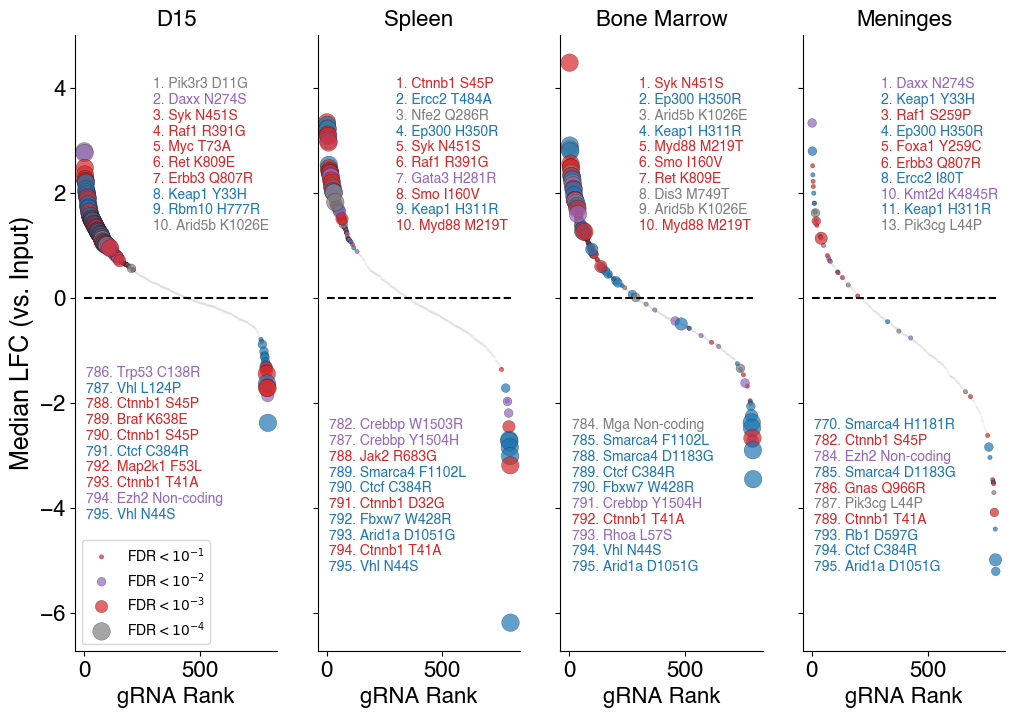

In [140]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 20
FDR_cutoff = .1
min_input_counts = 2

ABE_targ = ABE_LFC_FDR[(ABE_LFC_FDR['classification']=='targeting guide')& (ABE_LFC_FDR['target_base_edit_perc']>=min_edit) & (ABE_LFC_FDR['Input_median']>=min_input_counts)]

#-----and plotting--------
names2 = ['d15','spleen', 'bonemarrow', 'meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = ABE_targ.sort_values(by=f'LFC_median_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]



    #split by significance level

    cc2_other = cc2[cc2[f'FDR_{val}']>=FDR_cutoff]
    ax[k].scatter(cc2_other['Rank'], cc2_other[f'LFC_median_{val}'], color=cc2_other['color'], s=1, alpha=.01)

    #FDR_cutoffs = [10**-4, 10**-3, 10**-2, 10**-1]

    FDR_cutoffs = [10**-1, 10**-2, 10**-3, 10**-4]

    size_dict = dict(zip(FDR_cutoffs, [10,40,80,160]))
    label_dict = dict(zip(FDR_cutoffs, ['FDR < $10^{-1}$', 'FDR < $10^{-2}$', 'FDR < $10^{-3}$', 'FDR < $10^{-4}$']))

   # for id1, cut in enumerate(FDR_cutoffs):
     #   if id1==0:
     #       cc2_sig = cc2[cc2[f'FDR_{val}']<cut]
            
     #   else:
     #       cc2_sig = cc2[(cc2[f'FDR_{val}']<cut) & (cc2[f'FDR_{val}']>=FDR_cutoffs[id1-1])]

      #  ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=size_dict[cut], label=label_dict[cut])

    for id1, cut in enumerate(FDR_cutoffs):
        if id1==3:
            cc2_sig = cc2[(cc2[f'FDR_{val}']<cut)]
            
        else:
            cc2_sig = cc2[(cc2[f'FDR_{val}']<cut) &(cc2[f'FDR_{val}']>=FDR_cutoffs[id1+1])]

        ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=size_dict[cut], label=label_dict[cut], linewidth=.2, edgecolor='black', alpha=.7)

    if k==0:
        ax[k].legend(loc='lower left')

    #------making plot pretty------

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    cc3 = cc2[cc2[f'FDR_{val}']<FDR_cutoff]
    top = cc3[:10]
    bottom = cc3[-10:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []

    ns = []
    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_median_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (human)'
        b = val2['gene_name_m_corrected']
        t.append(f'{b} {a}')

        ns.append(f'{val2["Rank"]}. {b} {a}')
        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')

    #top

    for idx, j in enumerate(ns[:10]):
        ax[k].text(300,4-idx*.3, j, color=c[idx])
        print(f'{j}')

    for idx, j in enumerate(ns[10:]):
        if k==0:
            ax[k].text(10,-1.5 -(idx*.3), j, color=c[idx+10])
            print(f'{j}')
        else:
            ax[k].text(10,-2.5 -(idx*.3), j, color=c[idx+10])
            print(f'{j}')


    #for idx, j in enumerate(ns[5:]):
        #ax[k].text()

    #texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    #adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('Median LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

#fig.savefig('figures/2g_UPDATED.png', dpi=300, transparent=True)

d15
1 Kmt2b R2717C tab:grey
2 Dnmt3a P800L tab:blue
3 Tcf7l2 P392S tab:red
4 Gata2 P175L tab:red
5 Foxp1 R465H tab:red
6 Fgf3 M190I tab:grey
7 Rab35 R69H tab:grey
8 Erg R309C tab:red
9 Crebbp R482Q tab:purple
10 Tek R167W tab:grey
8 Erg R309C tab:red
9 Crebbp R482Q tab:purple
10 Tek R167W tab:grey
12 Ptprs R925C tab:grey
13 Flt3 P937L tab:red
14 Carm1 R337W tab:grey
15 Kmt2d Q3632* tab:purple
16 Stag2 Q786* tab:blue
20 Kmt2d S2130L tab:purple
29 Eif4e R112Q tab:grey
1. Kmt2b R2717C
2. Dnmt3a P800L
3. Tcf7l2 P392S
4. Gata2 P175L
5. Foxp1 R465H
6. Fgf3 M190I
7. Rab35 R69H
8. Erg R309C
9. Crebbp R482Q
10. Tek R167W
spleen
1 Tek R167W tab:grey
2 Flt4 p.G1154R (H) tab:red
3 Zfhx3 A3330T tab:blue
4 Gnas R1004C tab:red
5 Brd4 E1160K tab:red
6 Keap1 R413C tab:blue
7 Cul3 R761C tab:blue
8 Card11 R888C tab:red
9 Card11 R967C tab:red
10 Ptprt E831K tab:blue
8278 Myod1 R120H tab:red
8279 Med12 R1497C tab:blue
8280 Pim1 E246K tab:red
8281 Atm E2454K tab:blue
8282 Ikzf1 p.R208* (H) tab:blue
8283 Sma

Text(0.5, 1.0, 'Meninges')

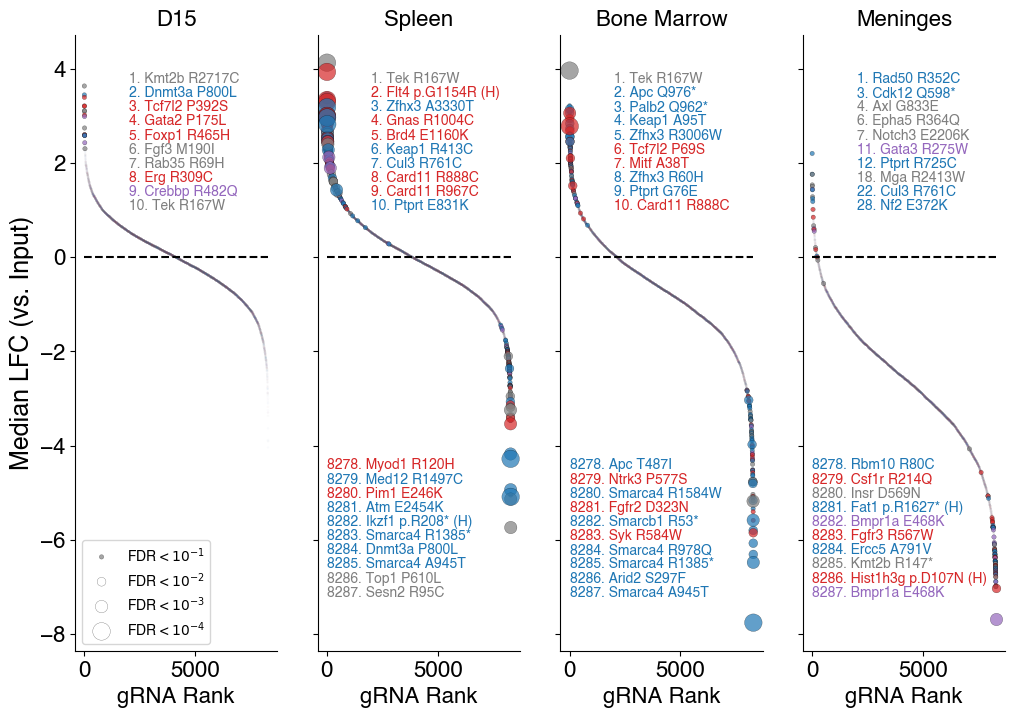

In [141]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

min_edit = 20
FDR_cutoff = .1
min_input_counts = 2

CBE_targ = CBE_LFC_FDR[(CBE_LFC_FDR['classification']=='targeting guide')& (CBE_LFC_FDR['target_base_edit_perc']>=min_edit) & (CBE_LFC_FDR['Input_median']>=min_input_counts)]

#-----and plotting--------
names2 = ['d15','spleen', 'bonemarrow', 'meninges',]

color_dict = {'Oncogene':'tab:red', 'Oncogene/TSG':'tab:purple', 'TSG':'tab:blue', 'Undefined':'tab:grey'}

fig, ax = plt.subplots(1,4,figsize=(12,8), sharey=True)

for k, val in enumerate(names2):
    #cc = CBE_mageck_dict[val].rename(columns={'sgrna':'gRNA_id'})
    #cc2 = pd.merge(cc, CBE_targ, on='gRNA_id')
    #cc2 = cc2.sort_values(by='LFC', ascending=False)

    cc2 = CBE_targ.sort_values(by=f'LFC_median_{val}', ascending=False)

    cc2['Rank'] = range(1, len(cc2)+1)
    cc2['color'] = [color_dict[i] for i in cc2['Role in Cancer']]



    #split by significance level

    cc2_other = cc2[cc2[f'FDR_{val}']>=FDR_cutoff]
    ax[k].scatter(cc2_other['Rank'], cc2_other[f'LFC_median_{val}'], color=cc2_other['color'], s=1, alpha=.01)

    #FDR_cutoffs = [10**-4, 10**-3, 10**-2, 10**-1]

    FDR_cutoffs = [10**-1, 10**-2, 10**-3, 10**-4]

    size_dict = dict(zip(FDR_cutoffs, [10,40,80,160]))
    label_dict = dict(zip(FDR_cutoffs, ['FDR < $10^{-1}$', 'FDR < $10^{-2}$', 'FDR < $10^{-3}$', 'FDR < $10^{-4}$']))

   # for id1, cut in enumerate(FDR_cutoffs):
     #   if id1==0:
     #       cc2_sig = cc2[cc2[f'FDR_{val}']<cut]
            
     #   else:
     #       cc2_sig = cc2[(cc2[f'FDR_{val}']<cut) & (cc2[f'FDR_{val}']>=FDR_cutoffs[id1-1])]

      #  ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=size_dict[cut], label=label_dict[cut])

    for id1, cut in enumerate(FDR_cutoffs):
        if id1==3:
            cc2_sig = cc2[(cc2[f'FDR_{val}']<cut)]
            
        else:
            cc2_sig = cc2[(cc2[f'FDR_{val}']<cut) &(cc2[f'FDR_{val}']>=FDR_cutoffs[id1+1])]

        ax[k].scatter(cc2_sig['Rank'], cc2_sig[f'LFC_median_{val}'],color=cc2_sig['color'], s=size_dict[cut], label=label_dict[cut], linewidth=.2, edgecolor='black', alpha=.7)

    if k==0:
        ax[k].legend(loc='lower left')

    #------making plot pretty------

    ax[k].spines[['top', 'right']].set_visible(False)
    ax[k].tick_params(axis='both', which='major', labelsize=16,)
    ax[k].plot([1, len(cc2)+1], [0,0], linestyle='dashed', color='black')
    ax[k].set_xlabel('gRNA Rank', fontsize=16)

    #and annotate top and bottom 5 variant
    cc3 = cc2[cc2[f'FDR_{val}']<FDR_cutoff]
    top = cc3[:10]
    bottom = cc3[-10:]
    tb = pd.concat((top, bottom))

    t = []
    x = []
    y = []
    c = []

    ns = []
    print(val)
    for i, val2 in tb.iterrows():
        y.append(val2[f'LFC_median_{val}'])
        x.append(val2['Rank'])
        c.append(val2['color'])
        a = val2['HGVSp_m']
        if a=='Not calculated (legacy)':
            a = val2['HGVSp_h'] + ' (H)'
        b = val2['gene_name_m_corrected']
        t.append(f'{b} {a}')

        ns.append(f'{val2["Rank"]}. {b} {a}')
        print(f'{val2["Rank"]} {b} {a} {val2["color"]}')

    #top
    #specific modifications for CBE
    if k==0:
        for idx, j in enumerate(ns[:10]):
            ax[k].text(2000,3.7-idx*.3, j, color=c[idx])
            print(f'{j}')

    elif k==3:
        for idx, j in enumerate(ns[:10]):
            ax[k].text(2000,3.7-idx*.3, j, color=c[idx])
            print(f'{j}')

    else: 
        for idx, j in enumerate(ns[:10]):

            ax[k].text(2000,3.7-idx*.3, j, color=c[idx])
            print(f'{j}')



    for idx, j in enumerate(ns[10:]):
        if k==0:
            continue
            #ax[k].text(10,-1.5 -(idx*.3), j, color=c[idx+10])
            #print(f'{j}')
        else:
            ax[k].text(10,-4.5 -(idx*.3), j, color=c[idx+10])
            print(f'{j}')


    #for idx, j in enumerate(ns[5:]):
        #ax[k].text()

    #texts = [ax[k].text(x[i], y[i], t[i], fontsize=12, color=c[i], path_effects=[PathEffects.withStroke(linewidth=3,foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)

    #adjust_text(texts, only_move={'points':'xy', 'texts':'xy'}, ax=ax[k], arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


#ax.set_ylim(0,20)

ax[0].set_ylabel('Median LFC (vs. Input)', fontsize=18)
ax[0].set_title('D15', fontsize=16)
ax[1].set_title('Spleen', fontsize=16)
ax[2].set_title('Bone Marrow', fontsize=16)
ax[3].set_title('Meninges', fontsize=16)

#fig.savefig('figures/2h_UPDATED.png', dpi=300, transparent=True)